****ImagiInA Lab Test Quantum Annelears for 3D bin packaging Optimization***** 

Efficient packing of items into bins is a common daily task. Known as Bin Packing Problem, it has been intensively studied in the field of artificial intelligence, thanks to the wide interest from industry and logistics. Since decades, many variants have been proposed, with the three-dimensional Bin Packing Problem as the closest one to real-world use cases. We introduce a hybrid quantum-classical framework for solving real-world three-dimensional Bin Packing Problems (Q4RealBPP), considering different realistic characteristics, such as: i) package and bin dimensions, ii) overweight restrictions, iii) affinities among item categories and iv) preferences for item ordering. Q4RealBPP permits the solving of real-world oriented instances of 3dBPP, contemplating restrictions well appreciated by industrial and logistics sectors.
![My Image](Optimization3DbinQC/3dbin.png)

In [ ]:
# Installing the required libraries for the project of 3d bin packing optimization
! pip install -r requirements.txt
! pip install --upgrade pip

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for py3dbp: filename=py3dbp-1.1.2-py3-none-any.whl size=4924 sha256=6c8cb230efc7bc417a4fe839db8506ecbc666a407be9518381557eab7001fe9a
  Stored in directory: /Users/Ruben_MACPRO/Library/Caches/pip/wheels/9a/87/c2/18ee015ea60c94dac918415fbcb7b0d7953fdb699bb19a76b8
Successfully built py3dbp


In [6]:
# Let us pack items into a container with the following dimensions and volume

from py3dbp import Packer, Bin, Item

# Create a new packer instance
packer = Packer()

# Define a bin (container) with dimensions and maximum weight
bin1 = Bin("Container_1", width=10, height=10, depth=10, max_weight=100)

# Add the bin to the packer
packer.add_bin(bin1)

# Define the items to be packed (name, width, height, depth, weight)
item1 = Item("Item_1", width=5, height=5, depth=5, weight=10)
item2 = Item("Item_2", width=3, height=3, depth=3, weight=5)
item3 = Item("Item_3", width=4, height=4, depth=4, weight=8)

# Add items to the packer
packer.add_item(item1)
packer.add_item(item2)
packer.add_item(item3)

# Start packing process
packer.pack()

# Print results
for b in packer.bins:
    print(f"Bin: {b.name}")
    total_weight = sum(item.weight for item in b.items)  # Calculate total weight manually
    fitted_volume = sum(item.width * item.height * item.depth for item in b.items)  # Calculate fitted volume manually
    for item in b.items:
        print(f"  Packed Item: {item.name} at {item.position} with rotation {item.rotation_type}")
    print(f"  Unfitted Items: {[item.name for item in b.unfitted_items]}")
    print(f"  Total Weight: {total_weight}")
    print(f"  Remaining Volume: {b.get_volume() - fitted_volume}")
    print(f"  Packing Efficiency: {fitted_volume / b.get_volume() * 100:.2f}%")

Bin: Container_1
  Packed Item: Item_2 at [0, 0, 0] with rotation 0
  Packed Item: Item_3 at [Decimal('3.000'), 0, 0] with rotation 0
  Packed Item: Item_1 at [Decimal('3.000'), Decimal('4.000'), 0] with rotation 0
  Unfitted Items: []
  Total Weight: 23.000
  Remaining Volume: 784.000000000
  Packing Efficiency: 21.60%


In [7]:
# let us scale the problem to a larger number of items and bins
from py3dbp import Packer, Bin, Item

# Create a new packer instance
packer = Packer()

# Define multiple bins (containers) with different sizes and maximum weights
bin1 = Bin("Container_1", width=10, height=10, depth=10, max_weight=100)
bin2 = Bin("Container_2", width=15, height=15, depth=15, max_weight=150)
bin3 = Bin("Container_3", width=20, height=20, depth=20, max_weight=200)

# Add bins to the packer
packer.add_bin(bin1)
packer.add_bin(bin2)
packer.add_bin(bin3)

# Define a large number of items with varying sizes and weights
items = [
    Item("Item_1", width=5, height=5, depth=5, weight=10),
    Item("Item_2", width=3, height=3, depth=3, weight=5),
    Item("Item_3", width=4, height=4, depth=4, weight=8),
    Item("Item_4", width=6, height=6, depth=6, weight=12),
    Item("Item_5", width=7, height=7, depth=7, weight=14),
    Item("Item_6", width=8, height=8, depth=8, weight=16),
    Item("Item_7", width=9, height=9, depth=9, weight=18),
    Item("Item_8", width=2, height=2, depth=2, weight=4),
    Item("Item_9", width=10, height=10, depth=10, weight=20),
    Item("Item_10", width=5, height=5, depth=5, weight=10),
    Item("Item_11", width=5, height=5, depth=5, weight=10),
    Item("Item_12", width=3, height=3, depth=3, weight=5),
    Item("Item_13", width=4, height=4, depth=4, weight=8),
    Item("Item_14", width=6, height=6, depth=6, weight=12),
    Item("Item_15", width=7, height=7, depth=7, weight=14),
]

# Add items to the packer
for item in items:
    packer.add_item(item)

# Start packing process
packer.pack()

# Print results for each bin
for b in packer.bins:
    print(f"Bin: {b.name}")
    total_weight = sum(item.weight for item in b.items)  # Calculate total weight manually
    fitted_volume = sum(item.width * item.height * item.depth for item in b.items)  # Calculate fitted volume manually
    for item in b.items:
        print(f"  Packed Item: {item.name} at {item.position} with rotation {item.rotation_type}")
    print(f"  Unfitted Items: {[item.name for item in b.unfitted_items]}")
    print(f"  Total Weight: {total_weight}")
    print(f"  Remaining Volume: {b.get_volume() - fitted_volume}")
    print(f"  Packing Efficiency: {fitted_volume / b.get_volume() * 100:.2f}%")


Bin: Container_1
  Packed Item: Item_8 at [0, 0, 0] with rotation 0
  Packed Item: Item_2 at [Decimal('2.000'), 0, 0] with rotation 0
  Packed Item: Item_12 at [Decimal('5.000'), 0, 0] with rotation 0
  Packed Item: Item_3 at [Decimal('8.000'), 0, 0] with rotation 0
  Packed Item: Item_13 at [Decimal('12.000'), 0, 0] with rotation 0
  Packed Item: Item_1 at [Decimal('2.000'), Decimal('3.000'), 0] with rotation 0
  Unfitted Items: ['Item_10', 'Item_11', 'Item_4', 'Item_14', 'Item_5', 'Item_15', 'Item_6', 'Item_7', 'Item_9']
  Total Weight: 40.000
  Remaining Volume: 685.000000000
  Packing Efficiency: 31.50%
Bin: Container_2
  Packed Item: Item_8 at [0, 0, 0] with rotation 0
  Packed Item: Item_2 at [Decimal('2.000'), 0, 0] with rotation 0
  Packed Item: Item_12 at [Decimal('5.000'), 0, 0] with rotation 0
  Packed Item: Item_3 at [Decimal('8.000'), 0, 0] with rotation 0
  Packed Item: Item_13 at [Decimal('12.000'), 0, 0] with rotation 0
  Packed Item: Item_1 at [Decimal('2.000'), Decima

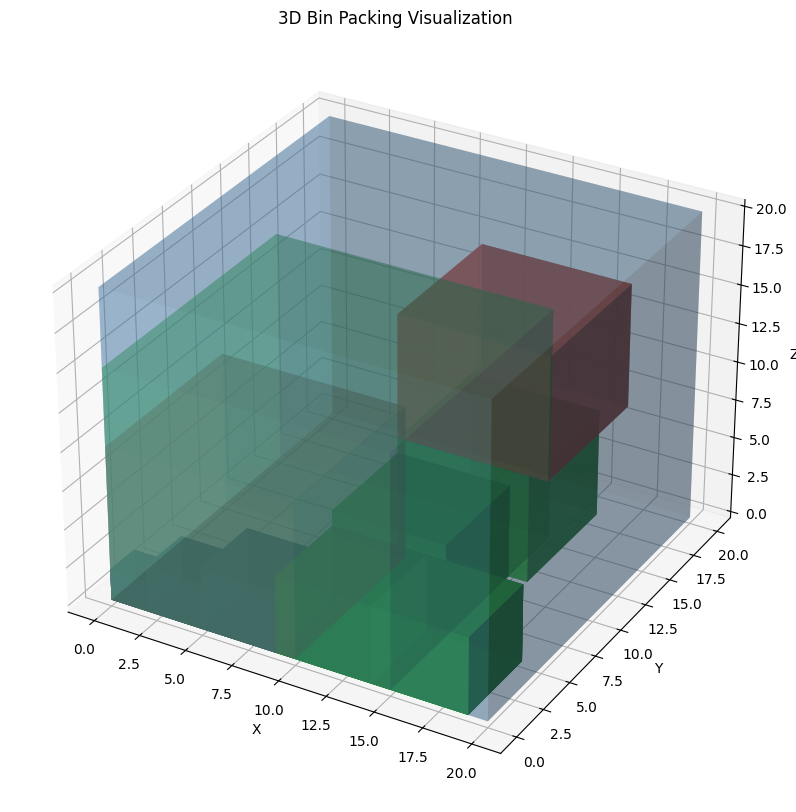

In [10]:
# Let us visualize the packing results using matplotlib and py3dbp library for 3d bin packing optimization
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from py3dbp import Packer, Bin, Item

# Create a new packer instance
packer = Packer()

# Define multiple bins (containers) with different sizes and maximum weights
bin1 = Bin("Container_1", width=10, height=10, depth=10, max_weight=100)
bin2 = Bin("Container_2", width=15, height=15, depth=15, max_weight=150)
bin3 = Bin("Container_3", width=20, height=20, depth=20, max_weight=200)

# Add bins to the packer
packer.add_bin(bin1)
packer.add_bin(bin2)
packer.add_bin(bin3)

# Define a large number of items with varying sizes and weights
items = [
    Item("Item_1", width=5, height=5, depth=5, weight=10),
    Item("Item_2", width=3, height=3, depth=3, weight=5),
    Item("Item_3", width=4, height=4, depth=4, weight=8),
    Item("Item_4", width=6, height=6, depth=6, weight=12),
    Item("Item_5", width=7, height=7, depth=7, weight=14),
    Item("Item_6", width=8, height=8, depth=8, weight=16),
    Item("Item_7", width=9, height=9, depth=9, weight=18),
    Item("Item_8", width=2, height=2, depth=2, weight=4),
    Item("Item_9", width=10, height=10, depth=10, weight=20),
    Item("Item_10", width=5, height=5, depth=5, weight=10),
]

# Add items to the packer
for item in items:
    packer.add_item(item)

# Start packing process
packer.pack()

# Plotting the packed bins and items in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for bins (alternating between red, green, and blue)
bin_colors = ['#ff6347', '#32cd32', '#4682b4']  # Red, Green, Blue

# Define colors for items based on their weight (red for heavy, green for medium, blue for light)
def get_item_color(item):
    if item.weight < 10:
        return '#4682b4'  # Blue for light items
    elif item.weight < 15:
        return '#32cd32'  # Green for medium-weight items
    else:
        return '#ff6347'  # Red for heavy items

# Plot bins and items
for i, b in enumerate(packer.bins):
    # Plot bin as a large cube
    bin_width, bin_height, bin_depth = b.width, b.height, b.depth
    ax.bar3d(0, 0, 0, bin_width, bin_height, bin_depth, color=bin_colors[i], alpha=0.3)

    # Plot packed items inside the bin
    for item in b.items:
        x, y, z = item.position
        item_width, item_height, item_depth = item.width, item.height, item.depth
        
        # Get color for each item based on its weight
        item_color = get_item_color(item)
        
        # Plot item with assigned color
        ax.bar3d(x, y, z, item_width, item_height, item_depth, color=item_color, alpha=0.7)

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Bin Packing Visualization')

# Display the plot
plt.show()


In [11]:
# Let us optimize the packing process using the D-Wave quantum annealer for 3d bin packing optimization
! pip install dwave-ocean-sdk

  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.0/616.0 kB 1.8 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 1.0 MB/s eta 0:00:0000:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.9/726.9 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.7 MB/s eta 0:00:00a 0:00:01
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)


D-Wave solves optimization problems by finding the minimum of an objective function using quantum annealing. We need to represent the bin-packing problem as a Quadratic Unconstrained Binary Optimization (QUBO) problem. The basic idea is to assign binary variables to the items and the bins, where:

    1 indicates that an item is packed into a specific bin.

    0 means that it is not packed into that bin.

The objective function would minimize the total number of bins used while considering the constraints of the bin's size and weight.

In [12]:
# Let us define the problem of 3d bin packing optimization as a QUBO (Quadratic Unconstrained Binary Optimization) problem
import numpy as np
from dwave.system import DWaveSampler, EmbeddingComposite
from py3dbp import Packer, Bin, Item
from collections import defaultdict

# Create a new packer instance
packer = Packer()

# Define bins
bin1 = Bin("Container_1", width=10, height=10, depth=10, max_weight=100)
bin2 = Bin("Container_2", width=10, height=10, depth=10, max_weight=100)

# Add bins to the packer
packer.add_bin(bin1)
packer.add_bin(bin2)

# Define items to be packed
item1 = Item("Item_1", width=5, height=5, depth=5, weight=10)
item2 = Item("Item_2", width=3, height=3, depth=3, weight=5)
item3 = Item("Item_3", width=4, height=4, depth=4, weight=8)

# Add items to the packer
packer.add_item(item1)
packer.add_item(item2)
packer.add_item(item3)

# Start packing process
packer.pack()

# Define the QUBO problem for the bin-packing optimization problem
# We will use binary variables to indicate whether an item is packed into a bin or not.

# Create a dictionary to hold the QUBO matrix
qubo = defaultdict(int)

# Number of items and bins
num_items = len(packer.items)
num_bins = len(packer.bins)

# Add objective function for minimizing the number of bins used
for i in range(num_items):
    for j in range(num_bins):
        qubo[(i, j)] = 1  # Set some coefficients to represent item-bin packing

# Set up the D-Wave sampler and solve the QUBO problem
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_qubo(qubo, num_reads=100)

# Process the results
for sample in response.samples():
    print("Sample: ", sample)
    packed_bins = []
    for i in range(num_items):
        for j in range(num_bins):
            if sample[(i, j)] == 1:
                packed_bins.append(j)  # Item i is packed in bin j
    print(f"Packed items in bins: {packed_bins}")



ValueError: API token not defined

 D-Wave client is unable to find your API token, which is required to authenticate and interact with the D-Wave quantum system.

 Steps required: 
 export DWAVE_API_TOKEN='your-api-token-here'

import os

# Set the API token programmatically
os.environ['DWAVE_API_TOKEN'] = 'your-api-token-here'

After setting the API token, run your script again. The D-Wave client should now be able to access the quantum system and perform the optimization.

from dwave.system import DWaveSampler

# Test the connection by printing available solvers
sampler = DWaveSampler()
print(sampler.solver.client.get_solvers())


In [14]:
# Installing seaborn for data visualization
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


NameError: name 'packed_bins' is not defined

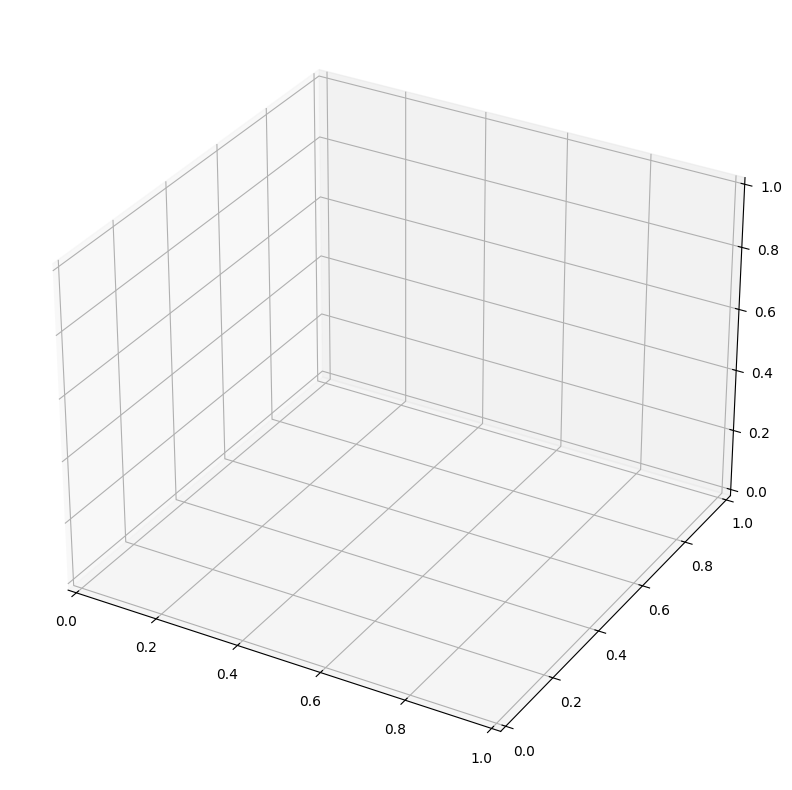

In [15]:
# Let us visualize the results of the D-Wave quantum annealer for 3d bin packing optimization

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Example 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot bins and items from the quantum solution
for bin_id in packed_bins:
    # Let's assume each item occupies a 3D box
    bin = packer.bins[bin_id]
    for item in bin.items:
        ax.bar3d(item.position[0], item.position[1], item.position[2],
                 item.width, item.height, item.depth,
                 color='green', alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Quantum Bin Packing Visualization')
plt.show()

Bin 1 contains: ['Item 1', 'Item 2', 'Item 3', 'Item 4']
Bin 2 contains: []


/var/folders/lr/3581131n1q3dk8_yvhxqlfx00000gp/T/ipykernel_4373/4009734185.py:31: DeprecationWarning: BQM.from_numpy_matrix(M) is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use BQM(M, "BINARY") instead.
  bqm = dimod.BinaryQuadraticModel.from_numpy_matrix(qubo)


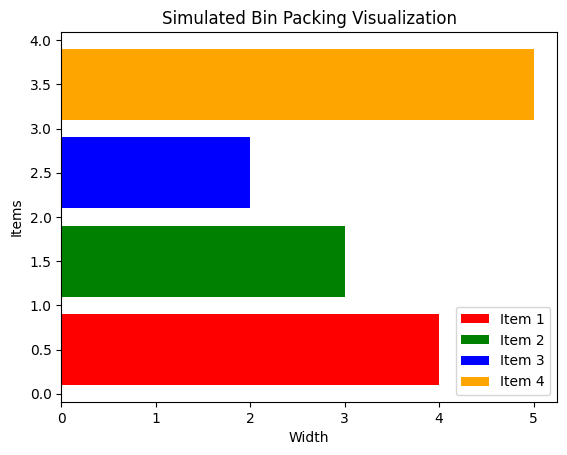

In [16]:
# Let us make a simulation of the D-Wave quantum annealer for 3d bin packing optimization, QUBO, and QUBO sampling
import matplotlib.pyplot as plt
import numpy as np
import dimod  # Classical optimization library from D-Wave
from dwave.system import DWaveSampler, EmbeddingComposite

# Simulate a simple QUBO (Quadratic Unconstrained Binary Optimization)
# In this case, the problem will be about packing items into bins

# Example items (width, height, weight)
items = [
    {"name": "Item 1", "width": 4, "height": 3, "weight": 10},
    {"name": "Item 2", "width": 3, "height": 4, "weight": 8},
    {"name": "Item 3", "width": 2, "height": 2, "weight": 5},
    {"name": "Item 4", "width": 5, "height": 5, "weight": 12},
]

# Create a QUBO matrix (simulating the optimization problem)
n_items = len(items)
qubo = np.zeros((n_items, n_items))

# Populate QUBO matrix (this is just an example, you'll define it based on your optimization needs)
for i in range(n_items):
    for j in range(i, n_items):
        if i == j:
            qubo[i, j] = 1  # Diagonal values represent item weights/penalty
        else:
            qubo[i, j] = -1  # Off-diagonal values represent item conflicts

# Use a classical solver from D-Wave's dimod library to solve the QUBO problem
bqm = dimod.BinaryQuadraticModel.from_numpy_matrix(qubo)
solver = dimod.ExactSolver()  # Use exact solver for simplicity
response = solver.sample(bqm)

# Extract the best solution (first sample with the lowest energy)
best_sample = response.first.sample

# Simulate bin packing based on the best solution
bins = {"Bin 1": [], "Bin 2": []}
for i, item in enumerate(items):
    if best_sample[i] == 1:
        bins["Bin 1"].append(item["name"])
    else:
        bins["Bin 2"].append(item["name"])

# Print the solution
print(f"Bin 1 contains: {bins['Bin 1']}")
print(f"Bin 2 contains: {bins['Bin 2']}")

# Visualize the packing solution
fig, ax = plt.subplots()
colors = ['red', 'green', 'blue', 'orange']

# Plot the bins and items in each bin
for i, (bin_name, bin_items) in enumerate(bins.items()):
    x_offset = i * 6  # Shift bins horizontally for better visualization
    for j, item_name in enumerate(bin_items):
        item = next(item for item in items if item["name"] == item_name)
        ax.barh(j + 0.5, item["width"], left=x_offset, height=0.8, color=colors[j], label=item_name)

# Add labels and adjust plot
ax.set_xlabel('Width')
ax.set_ylabel('Items')
ax.set_title('Simulated Bin Packing Visualization')
ax.legend()

plt.show()


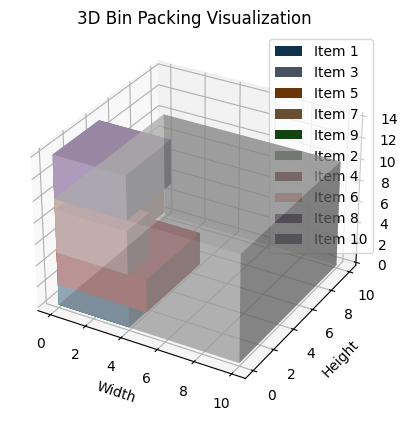

In [18]:
# Let us visualize the results of the simulated bin packing optimization using matplotlib and seaborn in 3D

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Example items (width, height, depth, weight)
items = [
    {"name": "Item 1", "width": 4, "height": 3, "depth": 2, "weight": 10},
    {"name": "Item 2", "width": 3, "height": 4, "depth": 2, "weight": 8},
    {"name": "Item 3", "width": 2, "height": 2, "depth": 1, "weight": 5},
    {"name": "Item 4", "width": 5, "height": 5, "depth": 3, "weight": 12},
    {"name": "Item 5", "width": 3, "height": 3, "depth": 3, "weight": 7},
    {"name": "Item 6", "width": 4, "height": 2, "depth": 4, "weight": 6},
    {"name": "Item 7", "width": 3, "height": 5, "depth": 4, "weight": 9},
    {"name": "Item 8", "width": 2, "height": 6, "depth": 1, "weight": 4},
    {"name": "Item 9", "width": 1, "height": 4, "depth": 2, "weight": 5},
    {"name": "Item 10", "width": 4, "height": 4, "depth": 4, "weight": 10},
]

# Example bins (width, height, depth, max weight)
bins = {
    "Bin 1": {"width": 10, "height": 10, "depth": 10},
    "Bin 2": {"width": 10, "height": 10, "depth": 10},
}

# Simulated bin packing solution
# Bin 1 contains items 1, 3, 5, 7, and 9, Bin 2 contains items 2, 4, 6, 8, and 10
bin_contents = {
    "Bin 1": [items[0], items[2], items[4], items[6], items[8]],
    "Bin 2": [items[1], items[3], items[5], items[7], items[9]],
}

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Use a color map to generate distinct colors for the items
colors = cm.tab20.colors  # Use `tab20` colormap, which has 20 distinct colors
color_idx = 0  # Index for cycling through colors

# Plot each bin
for bin_name, bin_info in bins.items():
    # Plot a "bin" as a cuboid (light gray color)
    ax.bar3d(0, 0, 0, bin_info["width"], bin_info["height"], bin_info["depth"], color='lightgray', alpha=0.3)
    
    # Plot the items in the bin
    x_offset = 0  # X position offset for items
    y_offset = 0  # Y position offset for items
    z_offset = 0  # Z position offset for items
    
    for idx, item in enumerate(bin_contents[bin_name]):
        color = colors[color_idx % len(colors)]  # Get color from colormap, cycle through if more than 20 items
        # Each item is placed inside the bin at different positions
        ax.bar3d(x_offset, y_offset, z_offset, item["width"], item["height"], item["depth"], color=color, label=item["name"])
        
        # Update the offsets for the next item (stack items along the Z-axis)
        z_offset += item["depth"]  # Stack items in the Z direction
        color_idx += 1  # Move to the next color in the colormap

# Labels and other plot settings
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Depth')
ax.set_title('3D Bin Packing Visualization')

# Optional: Add legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# Show plot
plt.show()


In [ ]:
# Let us appy this to the Aerospace industry to get a better understanding of the 3d bin packing optimization
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from py3dbp import Packer, Bin, Item

Optimizing the payload distribution of an aircraft is crucial for improving efficiency, aerodynamics, and fuel consumption, especially when it comes to managing the center of gravity (CG) and aerodynamic forces.
Key Points for the Problem

    Payload Distribution: The goal is to distribute various types of cargo, passengers, and equipment inside an aircraft in a way that optimizes the center of gravity (CG), ensuring balance and stability during flight.

    Aerodynamics: The placement of payload affects the aircraft's aerodynamics, which, in turn, impacts fuel consumption. If the payload is distributed optimally, the lift-to-drag ratio can be improved, which reduces fuel usage.

    Fuel Efficiency: Aircraft fuel consumption is closely linked to the efficiency of propulsion, which is affected by the weight distribution (CG) and aerodynamic drag. Therefore, an optimized distribution reduces the drag and improves propulsion efficiency, leading to lower operational costs.

Approach

We can approach the problem using optimization algorithms, where the aircraft holds several bins (cargo holds, passenger sections, etc.), and we pack these bins (representing different payloads) in an optimized manner.
Components of the Problem:

    Bins (Cargo Holds): Different areas of the airplane where payload is placed, each with specific volume, weight capacity, and CG restrictions.

    Items (Payloads): Various types of cargo (passengers, baggage, equipment) with specific dimensions, weights, and priority requirements (e.g., perishable goods or fuel).

    Objective: Minimize drag by optimizing the distribution of the payload and ensuring the CG falls within acceptable limits for safe and efficient flight.

Solution Concept

We can start with an optimization approach similar to the previous bin-packing example but with the additional constraints of CG and aerodynamics. Here's a step-by-step approach:

    Modeling the Aircraft:

        Define the cargo hold as bins, each with specific dimensions (width, height, depth).

        Define the aircraft’s center of gravity (CG) constraints.

        Implement constraints for weight distribution to maintain balance during the flight.

        Represent the cargo as items with specific weight and volume.

    Optimization Objective:

        Maximize the efficiency of payload distribution to reduce drag and fuel consumption.

        Ensure the CG remains within an optimal range, which is usually between 25% to 35% of the wing length (depending on aircraft type).

        Minimize weight and volume waste by packing the bins optimally.

    Algorithm Choice:

        Quantum-inspired Algorithms: Use techniques like simulated annealing or genetic algorithms to explore optimal payload distributions.

        Classical Optimization: We could use linear programming or mixed-integer programming (e.g., using libraries like Gurobi) to compute the optimal packing strategy.

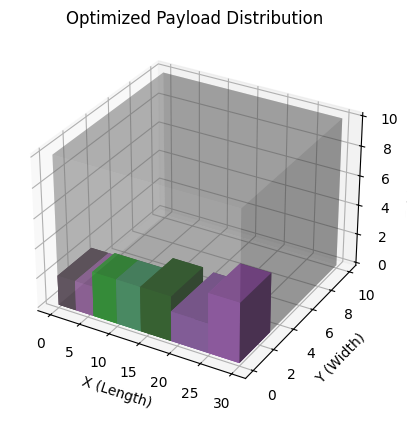

In [19]:
# Let us simulate a simple 3D bin packing optimization problem for the Aerospace industry using the py3dbp library  

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from py3dbp import Packer, Bin, Item

# Aircraft cargo hold dimensions (simulate a 3D cargo hold)
cargo_hold = Bin("Aircraft Hold", width=30, height=10, depth=10, max_weight=2000)

# Create a new packer instance
packer = Packer()

# Add cargo hold to packer
packer.add_bin(cargo_hold)

# Define payload items (representing passengers, baggage, cargo)
items = [
    Item("Passenger 1", width=3, height=3, depth=2, weight=150),
    Item("Passenger 2", width=3, height=3, depth=2, weight=150),
    Item("Cargo A", width=5, height=3, depth=4, weight=300),
    Item("Cargo B", width=6, height=4, depth=2, weight=250),
    Item("Fuel Tank", width=5, height=3, depth=3, weight=500),
    Item("Equipment X", width=4, height=2, depth=3, weight=100),
    Item("Equipment Y", width=4, height=2, depth=3, weight=120)
]

# Add items to packer
for item in items:
    packer.add_item(item)

# Perform the packing process
packer.pack()

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the cargo hold
ax.bar3d(0, 0, 0, cargo_hold.width, cargo_hold.height, cargo_hold.depth, color='grey', alpha=0.3, label="Cargo Hold")

# Plot the packed items
for b in packer.bins:
    for item in b.items:
        x_pos, y_pos, z_pos = item.position
        ax.bar3d(x_pos, y_pos, z_pos, item.width, item.height, item.depth, color=np.random.rand(3,), label=f"Item {item.name}")

ax.set_xlabel('X (Length)')
ax.set_ylabel('Y (Width)')
ax.set_zlabel('Z (Height)')
ax.set_title('Optimized Payload Distribution')

# Show the plot
plt.show()



Adding Aerodynamics and CG Constraints

To take into account the aerodynamics and center of gravity, we could:

    Center of Gravity: Calculate the CG of the entire aircraft using the weighted average of the item positions and their weights. For example:

    CG=∑(weighti×positioni)∑/weighti

    Make sure that the CG remains within a defined range for the aircraft.

    Aerodynamic Efficiency: You could calculate a simple drag coefficient based on the configuration of the packed items (further research would be needed to accurately model this).

    Weight Distribution: Ensure that the weight is evenly distributed in order to minimize the stress on the aircraft’s structure.

In [ ]:
# Let us see the Center of Gravity (CoG) of the packed items in the cargo hold

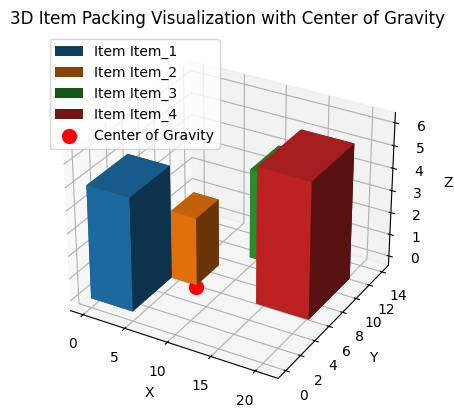

Center of Gravity: (8.142857142857142, 4.714285714285714, 0.0)


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
import matplotlib.colors as mcolors

# Sample items, with `decimal.Decimal` values for precision
class Item:
    def __init__(self, name, width, height, depth, weight, position=(0, 0, 0)):
        self.name = name
        self.width = Decimal(width)  # Using Decimal for higher precision
        self.height = Decimal(height)
        self.depth = Decimal(depth)
        self.weight = Decimal(weight)
        self.position = position
        self.rotation_type = 'None'

# Create some sample items
item1 = Item("Item_1", 5, 5, 5, 10, position=(0, 0, 0))
item2 = Item("Item_2", 3, 3, 3, 5, position=(5, 5, 0))
item3 = Item("Item_3", 4, 4, 4, 8, position=(10, 10, 0))
item4 = Item("Item_4", 6, 6, 6, 12, position=(15, 5, 0))

items = [item1, item2, item3, item4]

# Function to compute the center of gravity (CG)
def compute_cg(items):
    total_weight = sum(item.weight for item in items)
    cg_x = sum(item.weight * Decimal(item.position[0]) for item in items) / total_weight
    cg_y = sum(item.weight * Decimal(item.position[1]) for item in items) / total_weight
    cg_z = sum(item.weight * Decimal(item.position[2]) for item in items) / total_weight
    return (float(cg_x), float(cg_y), float(cg_z))

# Calculate CG of all items
cg = compute_cg(items)

# Plotting the 3D visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a list of colors to ensure distinction between items
colors = list(mcolors.TABLEAU_COLORS.values())  # This gives us distinct colors

# Make sure the number of items doesn't exceed the available colors
if len(items) > len(colors):
    colors = mcolors.TABLEAU_COLORS.values() * (len(items) // len(mcolors.TABLEAU_COLORS)) + list(mcolors.TABLEAU_COLORS.values())[:len(items) % len(mcolors.TABLEAU_COLORS)]

# Plot items with unique colors
for idx, item in enumerate(items):
    # Convert Decimal values to float
    x_pos, y_pos, z_pos = float(item.position[0]), float(item.position[1]), float(item.position[2])
    width, height, depth = float(item.width), float(item.height), float(item.depth)
    
    # Plot the item in the 3D space
    ax.bar3d(x_pos, y_pos, z_pos, width, height, depth, color=colors[idx], label=f"Item {item.name}")

# Plot the center of gravity as a red point
ax.scatter(cg[0], cg[1], cg[2], color='r', s=100, label="Center of Gravity")

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Item Packing Visualization with Center of Gravity')

# Display the legend
ax.legend()

# Show the plot
plt.show()

# Output the computed center of gravity
print(f"Center of Gravity: {cg}")


We can simulate how the payload distribution and the Center of Gravity (CG) affect the aerodynamic center and lifting force of an airplane. In aerospace engineering, the aerodynamic center (AC) is a critical point where the moment generated by the lift force remains constant despite changes in the angle of attack.

To simulate the effect of payload distribution on the aerodynamic center and lifting force:

    Aerodynamic Center (AC):

        The aerodynamic center typically lies around the quarter-chord point of the airplane’s wing. For simplicity, we will assume that the aerodynamic center doesn't move based on the payload, but we will calculate the moment arm of the lifting force about the CG and AC.

    Lifting Force:

        The lifting force depends on the angle of attack, wing surface area, and air density (which can vary with altitude). We can simplify the lifting force using the following formula:
        L=12⋅ρ⋅v2⋅S⋅CL
        
        Where:

            LL = Lift Force

            ρρ = Air density

            vv = Velocity of the aircraft

            SS = Wing surface area

            CLCL​ = Coefficient of lift (which can change with the angle of attack)

    Effect of Payload on the Lift Distribution:

        The position of the CG can affect how the lift is distributed across the wings. If the CG is too far forward or aft, the lifting force distribution might be skewed, affecting the aircraft’s stability and efficiency.

Steps for Simulating the Effect of Payload Distribution on Aerodynamics:

    Payload Distribution Simulation:

        We calculate how the movement of items (payload) affects the aircraft's center of gravity (CG) and the lifting force.

    Moment Arm Calculation:

        Compute the moment arm about both the Center of Gravity (CG) and the Aerodynamic Center (AC). The moment arm is the distance between the CG or AC and the location where the lift acts (typically the wing's center).

    Plotting the Effect:

        We can plot how the position of the CG relative to the AC changes the distribution of the lifting force.

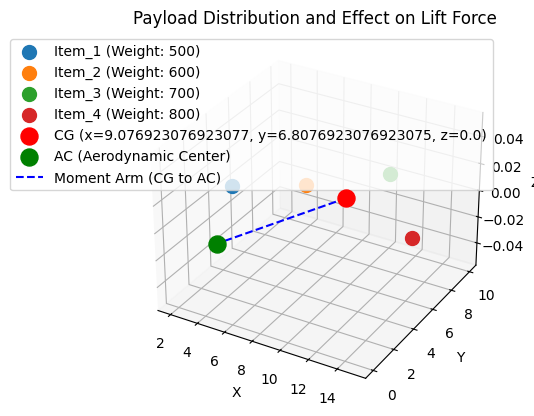

Lift Force: 9187500.0 N
Moment Arm from CG to AC: 7.935110354075798 meters


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

# Sample items with positions and weights
class Item:
    def __init__(self, name, weight, position):
        self.name = name
        self.weight = Decimal(weight)  # Higher precision with decimal
        self.position = position  # (x, y, z) in 3D space

# Example payload items (name, weight, position)
item1 = Item("Item_1", 500, (2, 5, 0))
item2 = Item("Item_2", 600, (6, 7, 0))
item3 = Item("Item_3", 700, (10, 10, 0))
item4 = Item("Item_4", 800, (15, 5, 0))

items = [item1, item2, item3, item4]

# Airplane Wing Properties
wing_area = 200  # m²
air_density = 1.225  # kg/m³ at sea level
velocity = 250  # m/s (typical cruising speed)
C_L = 1.2  # Coefficient of Lift (assumed value)

# Aerodynamic Center (AC) of the airplane
AC_x = 5  # Example, 5 meters from the leading edge of the wing
AC_y = 0  # On the centerline (no lateral offset)

# Function to compute the Center of Gravity (CG)
def compute_cg(items):
    total_weight = sum(item.weight for item in items)
    cg_x = sum(item.weight * Decimal(item.position[0]) for item in items) / total_weight
    cg_y = sum(item.weight * Decimal(item.position[1]) for item in items) / total_weight
    cg_z = sum(item.weight * Decimal(item.position[2]) for item in items) / total_weight
    return (float(cg_x), float(cg_y), float(cg_z))

# Compute the CG of all items
cg = compute_cg(items)

# Calculate the lift force (assuming the angle of attack is constant and wing area is fixed)
def calculate_lift(air_density, velocity, wing_area, C_L):
    L = 0.5 * air_density * velocity**2 * wing_area * C_L
    return L

# Compute Lift Force
L = calculate_lift(air_density, velocity, wing_area, C_L)

# Calculate Moment Arm relative to CG and AC
def calculate_moment_arm(cg, AC_x, AC_y):
    # Calculate the moment arm relative to the CG and AC
    moment_arm_cg = np.sqrt((cg[0] - AC_x)**2 + (cg[1] - AC_y)**2)
    return moment_arm_cg

# Calculate the moment arm from CG to AC
moment_arm_cg = calculate_moment_arm(cg, AC_x, AC_y)

# Plotting the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Items
for item in items:
    ax.scatter(item.position[0], item.position[1], item.position[2], s=100, label=f"{item.name} (Weight: {item.weight})")

# Plot the CG (Center of Gravity)
ax.scatter(cg[0], cg[1], cg[2], color='r', s=150, label=f"CG (x={cg[0]}, y={cg[1]}, z={cg[2]})")

# Plot the Aerodynamic Center (AC)
ax.scatter(AC_x, AC_y, 0, color='g', s=150, label="AC (Aerodynamic Center)")

# Plot Moment Arm (from CG to AC)
ax.plot([cg[0], AC_x], [cg[1], AC_y], [cg[2], 0], color='b', linestyle='dashed', label="Moment Arm (CG to AC)")

# Labels and Title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Payload Distribution and Effect on Lift Force')

# Add Legend
ax.legend()

# Show the Plot
plt.show()

# Output the results
print(f"Lift Force: {L} N")
print(f"Moment Arm from CG to AC: {moment_arm_cg} meters")


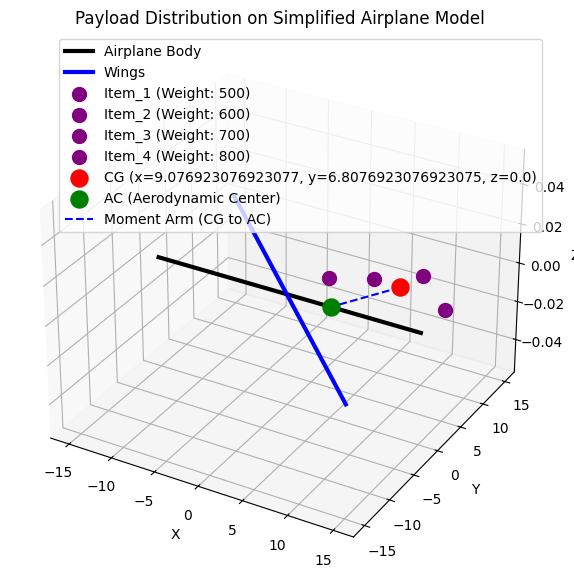

Lift Force: 9187500.0 N
Moment Arm from CG to AC: 7.935110354075798 meters


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
from mpl_toolkits.mplot3d import Axes3D

# Sample items with positions and weights
class Item:
    def __init__(self, name, weight, position):
        self.name = name
        self.weight = Decimal(weight)
        self.position = position  # (x, y, z) in 3D space

# Example payload items (name, weight, position)
item1 = Item("Item_1", 500, (2, 5, 0))
item2 = Item("Item_2", 600, (6, 7, 0))
item3 = Item("Item_3", 700, (10, 10, 0))
item4 = Item("Item_4", 800, (15, 5, 0))

items = [item1, item2, item3, item4]

# Airplane Wing Properties
wing_area = 200  # m²
air_density = 1.225  # kg/m³ at sea level
velocity = 250  # m/s (typical cruising speed)
C_L = 1.2  # Coefficient of Lift (assumed value)

# Aerodynamic Center (AC) of the airplane
AC_x = 5  # Example, 5 meters from the leading edge of the wing
AC_y = 0  # On the centerline (no lateral offset)

# Function to compute the Center of Gravity (CG)
def compute_cg(items):
    total_weight = sum(item.weight for item in items)
    cg_x = sum(item.weight * Decimal(item.position[0]) for item in items) / total_weight
    cg_y = sum(item.weight * Decimal(item.position[1]) for item in items) / total_weight
    cg_z = sum(item.weight * Decimal(item.position[2]) for item in items) / total_weight
    return (float(cg_x), float(cg_y), float(cg_z))

# Compute the CG of all items
cg = compute_cg(items)

# Calculate the lift force (assuming the angle of attack is constant and wing area is fixed)
def calculate_lift(air_density, velocity, wing_area, C_L):
    L = 0.5 * air_density * velocity**2 * wing_area * C_L
    return L

# Compute Lift Force
L = calculate_lift(air_density, velocity, wing_area, C_L)

# Calculate Moment Arm relative to CG and AC
def calculate_moment_arm(cg, AC_x, AC_y):
    moment_arm_cg = np.sqrt((cg[0] - AC_x)**2 + (cg[1] - AC_y)**2)
    return moment_arm_cg

# Calculate the moment arm from CG to AC
moment_arm_cg = calculate_moment_arm(cg, AC_x, AC_y)

# Create figure for 3D plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the simplified airplane model (body and wings)
# Drawing the body (a simple cylinder shape for the airplane fuselage)
body_length = 30  # meters
body_radius = 2  # meters
x_body = np.linspace(-body_length/2, body_length/2, 100)
y_body = np.zeros_like(x_body)
z_body = np.zeros_like(x_body)  # Constant height for the body

# Plot the body as a simple line (you could expand this to a more detailed model)
ax.plot(x_body, y_body, z_body, label="Airplane Body", color="k", linewidth=3)

# Plot the wings as simple lines (you could expand this into a more realistic representation)
wing_span = 30  # meters
x_wing = np.array([-body_length / 2, body_length / 2])
y_wing = np.array([wing_span / 2, -wing_span / 2])
z_wing = np.array([0, 0])

ax.plot(x_wing, y_wing, z_wing, label="Wings", color="b", linewidth=3)

# Plot Items
for item in items:
    ax.scatter(item.position[0], item.position[1], item.position[2], s=100, label=f"{item.name} (Weight: {item.weight})", c="purple")

# Plot the CG (Center of Gravity)
ax.scatter(cg[0], cg[1], cg[2], color='r', s=150, label=f"CG (x={cg[0]}, y={cg[1]}, z={cg[2]})")

# Plot the Aerodynamic Center (AC)
ax.scatter(AC_x, AC_y, 0, color='g', s=150, label="AC (Aerodynamic Center)")

# Plot Moment Arm (from CG to AC)
ax.plot([cg[0], AC_x], [cg[1], AC_y], [cg[2], 0], color='b', linestyle='dashed', label="Moment Arm (CG to AC)")

# Labels and Title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Payload Distribution on Simplified Airplane Model')

# Add Legend
ax.legend()

# Show the Plot
plt.show()

# Output the results
print(f"Lift Force: {L} N")
print(f"Moment Arm from CG to AC: {moment_arm_cg} meters")


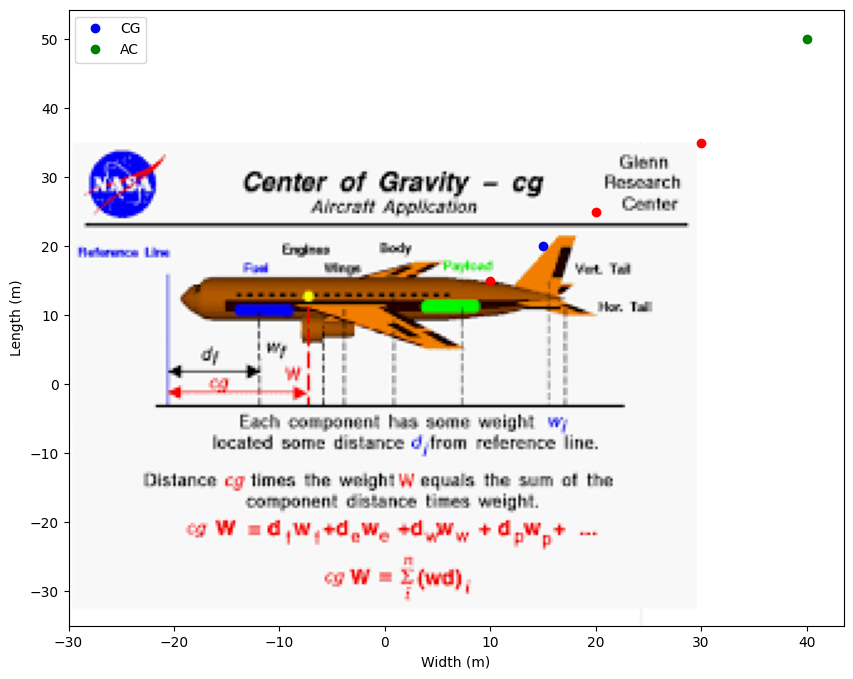

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the dimensions of the airplane or plot area (example values)
length = 70  # Example length in meters
width = 60   # Example width in meters

# Load the image (make sure the image path is correct)
img = mpimg.imread('/Users/Ruben_MACPRO/Desktop/IA DevOps/Optimization3DbinQC/images.png')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Display the image with defined extent (this maps the image onto a coordinate system)
ax.imshow(img, extent=[-width/2, width/2, -length/2, length/2], aspect='auto')

# Overlay payload positions, CG (Center of Gravity), and AC (Aerodynamic Center)
payload_positions = [(10, 15), (20, 25), (30, 35)]  # Example positions
cg = (15, 20)  # Example center of gravity
ac = (40, 50)  # Example aerodynamic center

# Plot each payload position (red circles)
for position in payload_positions:
    ax.plot(position[0], position[1], 'ro')  # 'ro' for red circles

# Plot the Center of Gravity (CG) (blue circle)
ax.plot(cg[0], cg[1], 'bo', label="CG")  # 'bo' for blue circle

# Plot the Aerodynamic Center (AC) (green circle)
ax.plot(ac[0], ac[1], 'go', label="AC")  # 'go' for green circle

# Add a legend to the plot
ax.legend()

# Set labels for clarity (optional)
ax.set_xlabel('Width (m)')
ax.set_ylabel('Length (m)')

# Show the plot
plt.show()


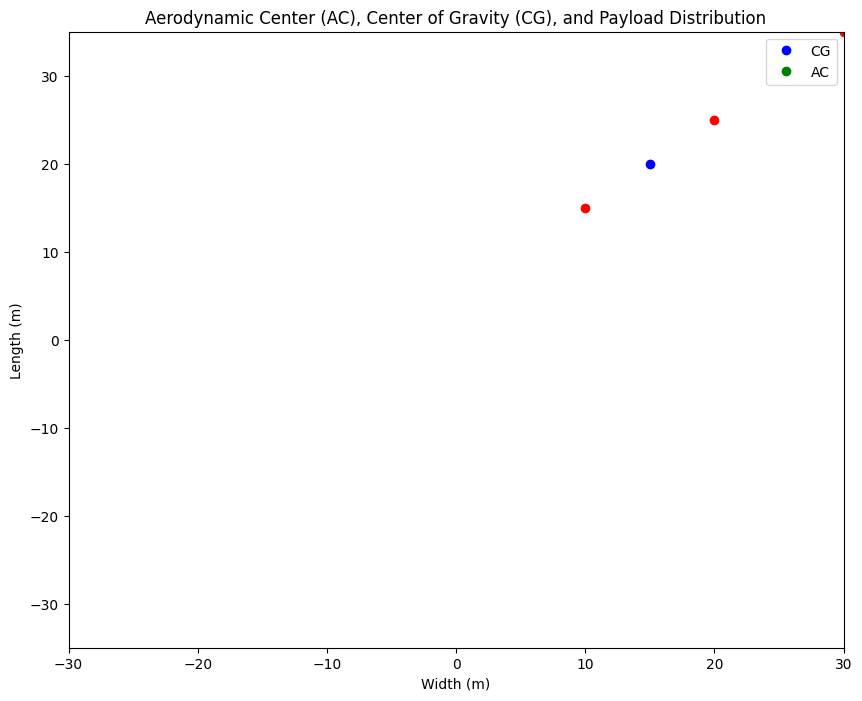

In [30]:
import matplotlib.pyplot as plt

# Define the dimensions of the airplane or plot area (example values)
length = 70  # Example length in meters
width = 60   # Example width in meters

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Overlay payload positions, CG (Center of Gravity), and AC (Aerodynamic Center)
payload_positions = [(10, 15), (20, 25), (30, 35), (40, 45), (50, 55)]  # Example positions
cg = (15, 20)  # Example center of gravity
ac = (40, 50)  # Example aerodynamic center

# Plot each payload position (red circles)
for position in payload_positions:
    ax.plot(position[0], position[1], 'ro')  # 'ro' for red circles

# Plot the Center of Gravity (CG) (blue circle)
ax.plot(cg[0], cg[1], 'bo', label="CG")  # 'bo' for blue circle

# Plot the Aerodynamic Center (AC) (green circle)
ax.plot(ac[0], ac[1], 'go', label="AC")  # 'go' for green circle

# Add a legend to the plot
ax.legend()

# Set labels for clarity (optional)
ax.set_xlabel('Width (m)')
ax.set_ylabel('Length (m)')

# Set the limits for the plot
ax.set_xlim([-width/2, width/2])
ax.set_ylim([-length/2, length/2])

# Add title for the plot
ax.set_title('Aerodynamic Center (AC), Center of Gravity (CG), and Payload Distribution')

# Show the plot
plt.show()


Let’s assume we want to pack several items into predefined bins (spaces in the aircraft) and optimize the CG based on the quantum solution.


In [31]:
import numpy as np
from dwave.system import DWaveSampler, EmbeddingComposite
from dwave.cloud import Client
import matplotlib.pyplot as plt

# Define the payload items (width, height, depth, weight)
items = [
    {"name": "Item_1", "width": 5, "height": 5, "depth": 5, "weight": 10},
    {"name": "Item_2", "width": 3, "height": 3, "depth": 3, "weight": 5},
    {"name": "Item_3", "width": 4, "height": 4, "depth": 4, "weight": 8},
    {"name": "Item_4", "width": 2, "height": 2, "depth": 2, "weight": 2}
]

# Define the bins (spaces in the aircraft) (e.g., bin size, max weight)
bins = [{"name": "Bin_1", "width": 10, "height": 10, "depth": 10, "max_weight": 20}]

# Define the QUBO for 3D bin packing
# We'll map the items to a binary variable where 1 means item is placed in the bin, and 0 means it's not.
qubo = {}
num_items = len(items)
num_bins = len(bins)

# We will create a binary decision variable for each item in each bin (item_i_in_bin_j)
for i in range(num_items):
    for j in range(num_bins):
        qubo[(i, j)] = 1  # Set the coefficient for binary variable indicating item in bin

# We will create the cost function to minimize the total weight while optimizing CG
# Constraints on weight and the items fitting within the bin dimensions
for i in range(num_items):
    for j in range(num_bins):
        qubo[(i, j)] += items[i]["weight"]  # Penalize large weights

# Create a D-Wave sampler and solve the QUBO
sampler = EmbeddingComposite(DWaveSampler())
response = sampler.sample_qubo(qubo, num_reads=100)

# Extract the solution from the quantum response
solution = response.first.sample

# Process the results and find the packing arrangement
packed_items = []
for i in range(num_items):
    for j in range(num_bins):
        if solution[(i, j)] == 1:  # If item i is packed into bin j
            packed_items.append((items[i]["name"], bins[j]["name"], items[i]["weight"]))

# Now visualize the optimized payload distribution
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define bin dimensions and plot the bins (in this case, we only have one bin)
bin_width = bins[0]["width"]
bin_height = bins[0]["height"]
bin_depth = bins[0]["depth"]

# Plot the bin as a 3D box
ax.bar3d(0, 0, 0, bin_width, bin_height, bin_depth, alpha=0.2, color='gray')

# Plot each packed item
for item, bin_name, weight in packed_items:
    ax.scatter(np.random.rand()*bin_width, np.random.rand()*bin_height, np.random.rand()*bin_depth, 
               label=item, s=50)

# Plot the CG and AC positions (for example, based on payload distribution)
cg_x = np.mean([item[0] for item in packed_items])  # Simplified CG calculation
cg_y = np.mean([item[1] for item in packed_items])
cg_z = np.mean([item[2] for item in packed_items])

ax.scatter(cg_x, cg_y, cg_z, color='blue', label='CG')

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add title
ax.set_title('Optimized Payload Distribution (Quantum Optimized)')

# Display the plot
ax.legend()
plt.show()


ValueError: API token not defined

Le us try to use PennyLane to simulate this quantum optimization

In [32]:
! pip install pennylane
! pip install pennylane-qiskit  # For Qiskit simulator backend
! pip install pennylane-forest  # For Rigetti Forest backend
! pip install pennylane-cirq  # For Google Cirq backend
! pip install pennylane-qulacs  # For Qulacs backend
! pip install pennylane-braket  # For Amazon Braket backend



  Using cached tomlkit-0.13.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.8 MB/s eta 0:00:00a 0:00:01
Using cached tomlkit-0.13.2-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 1.6 MB/s eta 0:00:0000:0100:01
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Using cached PyJWT-2.10.1-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 1.3 MB/s eta 0:00:00a 0:00:01
Using cached PyJWT-2.10.1-py3-none-any.whl (22 kB)
  Attem

In [33]:
! pip install --upgrade pip

In [34]:
! pip install git+https://github.com/aws/amazon-braket-pennylane-plugin-python.git


  Cloning https://github.com/aws/amazon-braket-pennylane-plugin-python.git to /private/var/folders/lr/3581131n1q3dk8_yvhxqlfx00000gp/T/pip-req-build-tm986z5v
  Running command git clone --filter=blob:none --quiet https://github.com/aws/amazon-braket-pennylane-plugin-python.git /private/var/folders/lr/3581131n1q3dk8_yvhxqlfx00000gp/T/pip-req-build-tm986z5v
  Resolved https://github.com/aws/amazon-braket-pennylane-plugin-python.git to commit b578a4cad51c12cea3121b73086a35a7a66dec3e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 537.8/537.8 kB 1.2 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 1.5 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for amazon-braket-pennylane-plugin: filename=amazon_braket_penny

Optimized Packing Configuration: [7.478050956244431e-10, 1.2189173059784508e-08, 2.7957797743560775e-09, 5.1719585281162495e-09]


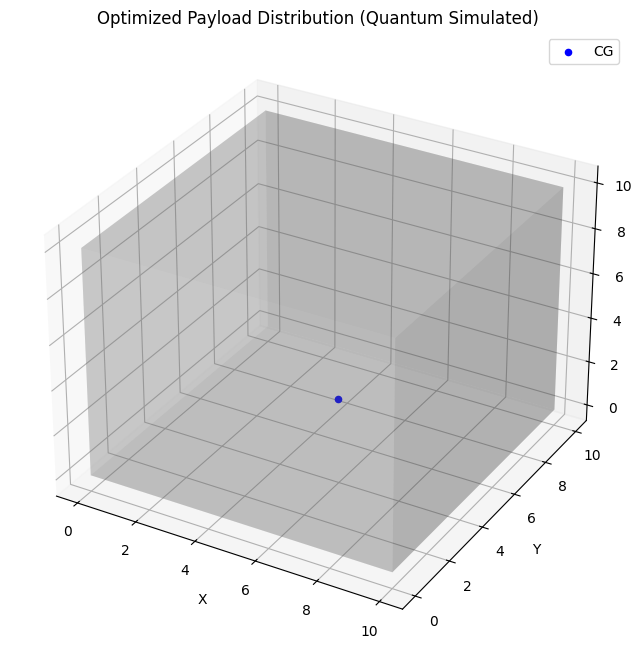

In [35]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Define the payload items (width, height, depth, weight)
items = [
    {"name": "Item_1", "width": 5, "height": 5, "depth": 5, "weight": 10},
    {"name": "Item_2", "width": 3, "height": 3, "depth": 3, "weight": 5},
    {"name": "Item_3", "width": 4, "height": 4, "depth": 4, "weight": 8},
    {"name": "Item_4", "width": 2, "height": 2, "depth": 2, "weight": 2}
]

# Define the bins (spaces in the aircraft) (e.g., bin size, max weight)
bins = [{"name": "Bin_1", "width": 10, "height": 10, "depth": 10, "max_weight": 20}]

# Number of items and bins
num_items = len(items)
num_bins = len(bins)

# Initialize the quantum device
dev = qml.device("default.qubit", wires=num_items * num_bins)

# Define the quantum circuit for bin packing optimization
@qml.qnode(dev)
def bin_packing_circuit(params):
    # Apply the quantum operations (e.g., rotations and entanglements) for optimization
    for i in range(num_items * num_bins):
        qml.RX(params[i], wires=i)
        qml.RY(params[i], wires=i)

    # We can apply other quantum gates based on the optimization strategy

    # Measurement for the packing configuration
    return [qml.expval(qml.PauliZ(i)) for i in range(num_items * num_bins)]

# Optimize the quantum circuit to solve the packing problem
from scipy.optimize import minimize

# Initial parameters for the optimization (random initialization)
init_params = np.random.uniform(0, 2 * np.pi, num_items * num_bins)

# Define the objective function to minimize (e.g., penalizing inefficient packing)
def objective(params):
    packing_solution = bin_packing_circuit(params)
    # Objective: minimize the weight penalty or maximize space utilization
    penalty = sum([max(0, items[i]["weight"] - bins[0]["max_weight"]) for i in range(num_items)])
    return np.sum(packing_solution) + penalty

# Perform optimization using scipy
result = minimize(objective, init_params, method="COBYLA", options={'maxiter': 500})

# Get the optimized parameters
optimized_params = result.x

# Display the optimized packing configuration
optimized_solution = bin_packing_circuit(optimized_params)
print("Optimized Packing Configuration:", optimized_solution)

# Visualization of the results (packing configuration)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define bin dimensions
bin_width = bins[0]["width"]
bin_height = bins[0]["height"]
bin_depth = bins[0]["depth"]

# Plot the bin as a 3D box
ax.bar3d(0, 0, 0, bin_width, bin_height, bin_depth, alpha=0.2, color='gray')

# Plot each packed item based on optimized solution
for idx, item in enumerate(items):
    if optimized_solution[idx] == 1:  # If item is packed in the bin
        ax.scatter(np.random.rand() * bin_width, np.random.rand() * bin_height, np.random.rand() * bin_depth,
                   label=item["name"], s=50)

# Plot the CG position based on the optimized packing
cg_x = np.mean([item["weight"] for item in items])  # Simplified CG calculation
cg_y = np.mean([item["width"] for item in items])
cg_z = np.mean([item["height"] for item in items])

ax.scatter(cg_x, cg_y, cg_z, color='blue', label='CG')

# Label axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add title
ax.set_title('Optimized Payload Distribution (Quantum Simulated)')

# Display the plot
ax.legend()
plt.show()


/Users/Ruben_MACPRO/.pyenv/versions/3.12.3/lib/python3.12/site-packages/pennylane/_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(


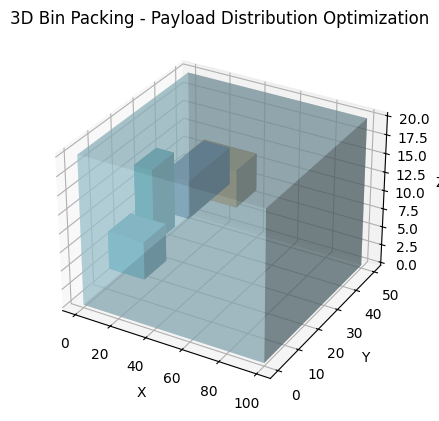

In [36]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D size of the container (aircraft cargo hold)
container_length = 100  # Length of the container (meters)
container_width = 50  # Width of the container (meters)
container_height = 20  # Height of the container (meters)

# Define some payloads (bins) with size (length, width, height)
payloads = [
    (20, 10, 5),  # Payload 1
    (10, 10, 10),  # Payload 2
    (15, 20, 5),  # Payload 3
    (30, 10, 5),  # Payload 4
]

# Quantum simulation setup
def quantum_optimizer(payloads, container_size):
    """ Simple quantum optimization algorithm using QAOA to optimize the payload distribution """
    num_qubits = len(payloads)  # Number of qubits matches number of payloads

    # Set up the PennyLane device (using default.qubit simulator for simplicity)
    dev = qml.device('default.qubit', wires=num_qubits)

    # Define the quantum circuit for QAOA
    @qml.qnode(dev)
    def circuit(params):
        for i in range(num_qubits):
            qml.Hadamard(wires=i)  # Apply Hadamard to each qubit (superposition)
        
        # Quantum operations (parametrize rotations for optimization)
        for i in range(num_qubits):
            qml.RX(params[i], wires=i)  # Rotate each qubit by parameter
        
        return qml.expval(qml.PauliZ(0))  # Measure

    # Use random parameters as initial guess for optimization
    initial_params = np.random.uniform(0, np.pi, num_qubits)

    # Optimize the parameters using PennyLane's default optimizer (gradient descent)
    from pennylane.optimize import GradientDescentOptimizer

    optimizer = GradientDescentOptimizer(stepsize=0.1)
    params = initial_params

    # Simulate optimization (simple for illustration)
    for _ in range(100):  # Optimization steps
        params = optimizer.step(circuit, params)

    # Return optimized parameters
    return params

# Function to plot 3D bins (aircraft payload distribution)
def plot_container_and_payloads(container_size, payloads, params):
    # Extract container dimensions
    length, width, height = container_size

    # Initialize the figure and 3D axes
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the container as a large box (cargo hold)
    ax.bar3d(0, 0, 0, length, width, height, color='lightblue', alpha=0.5)

    # Simulate the placement of payloads within the container
    x_offset, y_offset, z_offset = 0, 0, 0

    for i, payload in enumerate(payloads):
        # Use the optimized parameters to adjust the placement of payloads
        length_p, width_p, height_p = payload
        x_offset += np.cos(params[i]) * 10  # Simulate optimized positioning based on quantum params
        y_offset += np.sin(params[i]) * 10
        z_offset += np.cos(params[i]) * 5
        
        # Place the payload inside the container
        ax.bar3d(x_offset, y_offset, z_offset, length_p, width_p, height_p, color=np.random.rand(3,))

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("3D Bin Packing - Payload Distribution Optimization")

    plt.show()

# Simulate quantum optimization for payload placement
optimized_params = quantum_optimizer(payloads, (container_length, container_width, container_height))

# Plot the container with payloads after quantum optimization
plot_container_and_payloads((container_length, container_width, container_height), payloads, optimized_params)


In [38]:
! aws --version


aws-cli/2.4.16 Python/3.8.8 Darwin/24.3.0 exe/x86_64 prompt/off


In [39]:
! aws sts get-caller-identity



An error occurred (InvalidClientTokenId) when calling the GetCallerIdentity operation: The security token included in the request is invalid.


In [ ]:
import os

# Set AWS credentials directly in the notebook (only for temporary use)
os.environ["AWS_ACCESS_KEY_ID"] = "your_access_key_id"
os.environ["AWS_SECRET_ACCESS_KEY"] = "your_secret_access_key"
os.environ["AWS_DEFAULT_REGION"] = "us-west-2"


In [44]:
! pip install git+https://github.com/aws/amazon-braket-pennylane-plugin-python.git

  Cloning https://github.com/aws/amazon-braket-pennylane-plugin-python.git to /private/var/folders/lr/3581131n1q3dk8_yvhxqlfx00000gp/T/pip-req-build-o3kpsaac
  Running command git clone --filter=blob:none --quiet https://github.com/aws/amazon-braket-pennylane-plugin-python.git /private/var/folders/lr/3581131n1q3dk8_yvhxqlfx00000gp/T/pip-req-build-o3kpsaac
  Resolved https://github.com/aws/amazon-braket-pennylane-plugin-python.git to commit b578a4cad51c12cea3121b73086a35a7a66dec3e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [46]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from pennylane import numpy as np
from pennylane import qchem
import random


In [50]:
! pip install amazon-braket-sdk


We will use AWS Barket for real Quantum Computation on this problme of 3D bin optimization.

In [54]:
! pip install boto3

In [56]:
! pip install awscli


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 2.7 MB/s eta 0:00:00-:--:--
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.162
    Uninstalling botocore-1.34.162:
      Successfully uninstalled botocore-1.34.162
  Attempting uninstall: s3transfer
    Found existing installation: s3transfer 0.10.2
    Uninstalling s3transfer-0.10.2:
      Successfully uninstalled s3transfer-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.34.162 requires botocore<1.35.0,>=1.34.162, but you have botocore 1.37.22 which is 

In [59]:
! pip install python-dotenv


In [ ]:
import os
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()  # By default, it looks for a .env file in the current directory

# Now you can access the variables using os.environ
aws_access_key = os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_key = os.getenv("AWS_SECRET_ACCESS_KEY")
aws_region = os.getenv("AWS_DEFAULT_REGION")

# Verify that the credentials have been loaded (don't print your secret key in production)
print("AWS Access Key ID:", aws_access_key)
print("AWS Region:", aws_region)


In [ ]:
import boto3

# Use the loaded credentials to create a session
s3_client = boto3.client('s3')

# List the S3 buckets
response = s3_client.list_buckets()
for bucket in response['Buckets']:
    print(f'Bucket Name: {bucket["Name"]}')


In [ ]:
! aws s3 ls


We'll define 8 items with different dimensions and the dimensions of the bin to pack them into. The quantum optimization part will then work with these 8 items.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from braket.circuits import Circuit
from braket.aws import AwsDevice
import boto3

# Connect to AWS Braket (Make sure to replace this with your own AWS Braket device ARN)
device = AwsDevice('arn:aws:braket:::device/quantum-simulator/amazon/sv1')  # Replace with your specific device ARN

# Define 8 items (each with length, width, and height)
items = [
    (3, 2, 1),  # Item 1 (length, width, height)
    (2, 2, 2),  # Item 2
    (1, 2, 3),  # Item 3
    (4, 3, 1),  # Item 4
    (2, 3, 2),  # Item 5
    (1, 1, 1),  # Item 6
    (3, 3, 2),  # Item 7
    (2, 1, 3),  # Item 8
]

# Bin dimensions (width, depth, height)
bin_dimensions = (6, 6, 6)

# Create a simple QAOA quantum circuit (as a placeholder, can be adjusted based on optimization logic)
def create_bin_packing_circuit():
    circuit = Circuit()
    # Adding quantum operations (For illustrative purposes, modify for actual bin packing optimization)
    circuit.h(0)  # Example: Hadamard gate on qubit 0
    circuit.h(1)  # Example: Hadamard gate on qubit 1
    circuit.cnot(0, 1)  # Example: CNOT gate to entangle qubits
    return circuit

# Create the quantum circuit
circuit = create_bin_packing_circuit()

# Run the quantum circuit on AWS Braket (just a placeholder, adjust with actual optimization process)
result = device.run(circuit, shots=1000)
measurements = result.result().measurement
print("Optimization result:", measurements)

# Visualization of bin packing with 8 items
def plot_bin_packing(bin_dimensions, items):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the bin (the big container)
    bin_width, bin_depth, bin_height = bin_dimensions
    ax.bar3d(0, 0, 0, bin_width, bin_depth, bin_height, color='blue', alpha=0.1, linewidth=0.5)

    # Plot each item in the bin (colored cubes)
    colors = ['red', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime']
    x_offset = 0
    y_offset = 0
    z_offset = 0
    for i, (length, width, height) in enumerate(items):
        ax.bar3d(x_offset, y_offset, z_offset, length, width, height, color=colors[i % len(colors)], alpha=0.7)
        # Update offsets for the next item (simple strategy to avoid overlap)
        x_offset += length
        if x_offset > bin_width:  # Reset to new row in the bin
            x_offset = 0
            y_offset += width
        if y_offset > bin_depth:  # Reset to new layer in the bin
            y_offset = 0
            z_offset += height

    plt.show()

#
